Assignment #4

Write a Python function (or functions) that calculates the number of nucleotide sites for which 0 species in the multiple alignment agree with human, the number of nucleotide sites for which 1 species in the multiple alignment agrees with human, the number of nucleotide sites for which 2 species in the multiple alignment agree with human, ... and the number of nucleotide sites for which all the 29 other species in the multiple alignment agree with human. (There are a total of 30 species in the multiple alignment including human; human is always the first species listed in each block). The output of this function will be a list of 30 numbers. Consider the short example below:

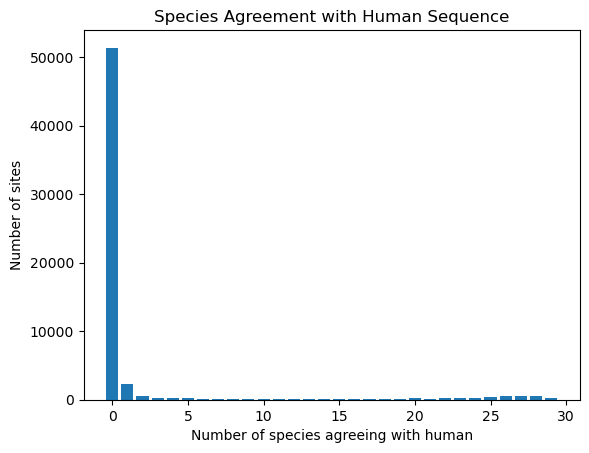

(a) List of 30 numbers: [51357, 2346, 543, 209, 290, 244, 152, 121, 104, 49, 66, 68, 33, 49, 51, 61, 125, 59, 59, 125, 219, 169, 238, 244, 291, 362, 477, 543, 563, 259]


In [1]:
import matplotlib.pyplot as plt

# Function: count_species reads a multi-alignment file to count the number of site matches between humans and 29 other species
# Parameter 1: file_path, where one reads in the file (csv, xslx, etc.)
# Output: A list of 30 integers where each index represents a match site between humans and one of the other 29th (index: 0-29) species
def count_species(file_path):
    # Opening file in read mode
    with open(file_path, 'r') as f:
        lines = f.readlines()

    human_sequence = None
    block_sequences = []
    agreement_counts = [0] * 30  # To store 30 counts, 0 to 29 matches

    # Process file line by line
    for line in lines:
        
        line = line.strip()  # Remove all whitespace

        # Ignore header and other non-sequence lines
        if not line or line.startswith("##") or line.startswith("i") or line.startswith("a"):
            
            continue  
        
        # Process species sequence lines that start with 's'
        if line.startswith("s"):
            species_info = line.split()  # Split line into components
            
            species_name = species_info[1].split(".")[0]  # Extract species id
            sequence = species_info[6]  # The aligned sequence portion for specific species

            if species_name == "hg38":  # Human sequence
                human_sequence = sequence  # Store human sequence
                
            else:
                # For other species, store their sequences in block_sequences
                block_sequences.append(sequence)

        # If human and species sequences present
        if human_sequence:
            
            # Count how many species match human at each nucleotide position
            for i in range(len(human_sequence)):
                
                match_count = 0  # Count of species matching human at position i
                for seq in block_sequences:
                    
                    if i < len(seq) and seq[i] == human_sequence[i]:  # Exact match
                        match_count += 1
                
                # Increment the corresponding index in agreement_counts
                agreement_counts[match_count] += 1

            # Reset for the next block
            human_sequence = None
            block_sequences = []

    # Plot "Number of Species" by "Number of Sites" 
    plt.bar(range(30), agreement_counts)
    plt.xlabel('Number of species agreeing with human')
    plt.ylabel('Number of sites')
    plt.title('Species Agreement with Human Sequence')
    plt.show()

    return agreement_counts

# Main Function - Printing Graph 
file_path = "/Users/tomasmanea/Desktop/Fall2024/QBIO401/A4/multiz30-ace2.txt"  
agreement_counts = count_species(file_path)
print("(a) List of 30 numbers:", agreement_counts)  


Notes:
a. For this assignment, agreement means the same capitalization (e.g., if human is “A” and
another species is “a”, they do NOT agree).
b. The short example just had one block, you have to do this for all blocks in the file. Just
report the results for the entire file (sum across all blocks, do not report separate results
for each block).
c. If a line begins with the letter “e” that species is NOT aligned for that block (so for that
block, none of the sites for that species agree with human). For some blocks, there are not 30 species listed (sometimes instead of beginning with the letter “e” an unaligned species is just not listed for that block).

Deliverables:
Turn in a Juptyer notebook with your code, the outputs of your function, and a bar graph with the number of species on the x-axis and the number of sites on the y-axis (for the short example: [0,1,2,3] on the x-axis and [1,1,3,2] on the y-axis).

